# Load libraries

In [1]:
library(docstring) ##documentation of R functions
library(ggplot2) ##pretty plots in R
library(cowplot) ##easy pretty ggplot figures
library(dplyr) ##rearranging df
library(tidyr) ##rearranging df
library(gridExtra) ## plotting mutliple figures on one plot
library(RColorBrewer) ##selecting colours from palettes
library(factoextra) ##visualize PCA results
library(extrafont)


Attaching package: ‘docstring’

The following object is masked from ‘package:utils’:

    ?


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


# Function definition

## Gather the dataframes


In [2]:
df_restructure <- function(data, data_names){
    
    data_df <- as.data.frame(data)
    rownames(data_df) <- data_names$V1

    data_gather <- as.data.frame(t(data_df)) %>% gather
    data_gather$position <-  rep(seq(1, ncol(data_df), 1), nrow(data_df)) 

    return(data_gather)
    
}


## Plot for the approximation

In [3]:
approximation_plot <- function(data_gather){

    ggplot(data_gather, aes(x=position, y=value, group=key)) + 
    geom_line(alpha=0.2, color='maroon') + theme_cowplot()
    
}

## Principle component analysis summary and plot functions

In [4]:
pc_summary <- function(pcs){
    ###############################
    ##Percent of variance explained
    ###############################
    eigs <- pcs$sdev^2
    print(paste0("PC1 variance explained = ", round(eigs[1] / sum(eigs)*100,2), " %"))
    print(paste0("PC2 variance explained = ", round(eigs[2] / sum(eigs)*100,2), " %"))
    print(paste0("PC3 variance explained = ", round(eigs[3] / sum(eigs)*100,2), " %"))
    print(paste0("PC4 variance explained = ", round(eigs[4] / sum(eigs)*100,2), " %"))
    
}

pca_custom_df <- function(pcs){
    

    pc_df <- as.data.frame(pcs$x[, 1])
    colnames(pc_df) <- "PC1"
    pc_df$PC2 <-  pcs$x[, 2]
    pc_df$PC3 <-  pcs$x[, 3]
    pc_df$PC4 <-  pcs$x[, 4]
    pc_df$protocol <- c(rep("GRO-seq", 16), rep("PRO-seq", 8))
    
    return(pc_df)
    
}

gg_pca <- function(df,pc_a, pc_b,col_by, palette, title,xlable,ylable, legendlab ){
    
    ggplot(df, aes(pc_a, pc_b, fill=col_by)) +
    ylab(ylable) + xlab(xlable) +
    ggtitle(title) +
    geom_point(size=3, shape=21,color="gray40") +
    theme_bw() +
    scale_fill_brewer(name = legendlab,palette=palette)+
    theme(panel.grid.major = element_blank(), ##get rid of mijor grid lines
          panel.grid.minor = element_blank(), ##get rid of minor grid lines
          panel.background = element_rect(colour = "black", size=0.75))+
    theme(plot.title = element_text(hjust = 0.5, family="Times"),
          title = element_text(size = 18, family="Times", face = "bold"), 
          axis.title = element_text(size = 14, family="Times", face = "bold"), 
          axis.text = element_text(size = 12, family="Times"),
         legend.title = element_text(family="Times"),
         legend.text = element_text(family="Times")) +
    theme(
        panel.background = element_rect(fill = "transparent"), # bg of the panel
        plot.background = element_rect(fill = "transparent", color = NA), # bg of the plot
        legend.key = element_rect(colour = "transparent", fill = "transparent"),
        legend.background = element_rect(fill = "transparent"), # get rid of legend bg
        legend.box.background = element_rect(fill = "transparent") # get rid of legend panel bg
  )
    
}

# Analysis of Coefficients

## GAPDH


In [6]:
gapdh_high_frequency <- read.table('./processed_data/gapdh_high_frequency_details_sasse.tsv', sep = '\t')
gapdh_low_frequency <- read.table('./processed_data/gapdh_low_frequency_approx_sasse.tsv', sep = '\t')
names <- read.table('./processed_data/samples_run.tsv', sep = '\t')

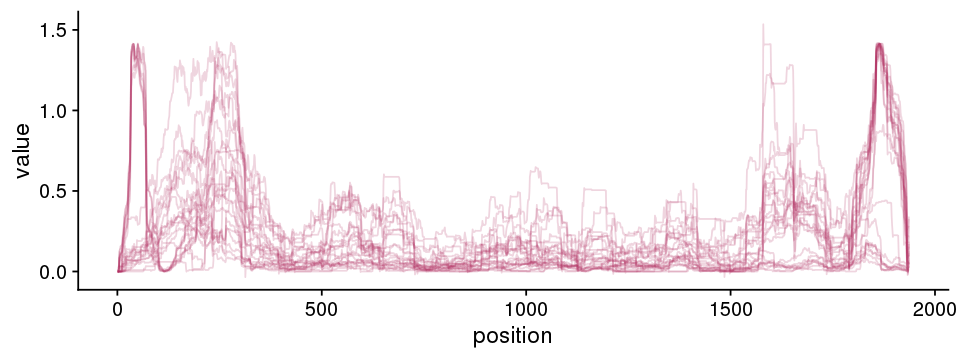

In [7]:
gapdh_low_data <- df_restructure(gapdh_low_frequency, names)
options(repr.plot.width=8, repr.plot.height=3)
approximation_plot(gapdh_low_data)

### PCA for Detail Coefficients

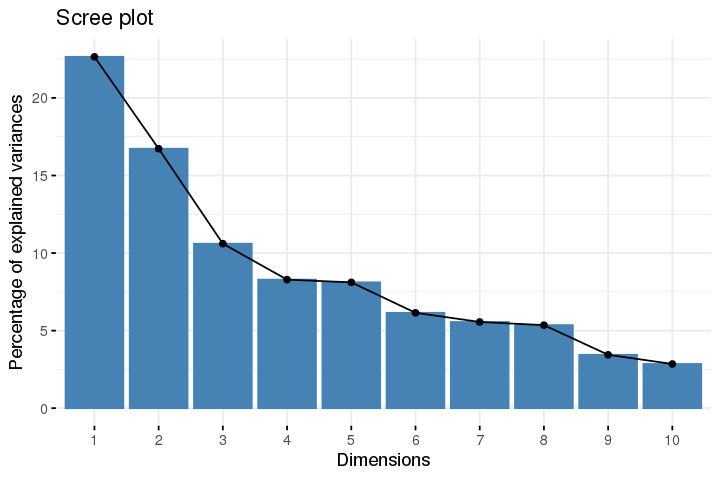

In [8]:
##Originbal PCA with all samples
gapdh_pc <- prcomp(gapdh_high_frequency)

options(repr.plot.width=6, repr.plot.height=4)
return(fviz_eig(gapdh_pc))

In [9]:
gapdh_pc_df <- pca_custom_df(gapdh_pc)

pc_summary(gapdh_pc)

[1] "PC1 variance explained = 22.65 %"
[1] "PC2 variance explained = 16.72 %"
[1] "PC3 variance explained = 10.6 %"
[1] "PC4 variance explained = 8.29 %"


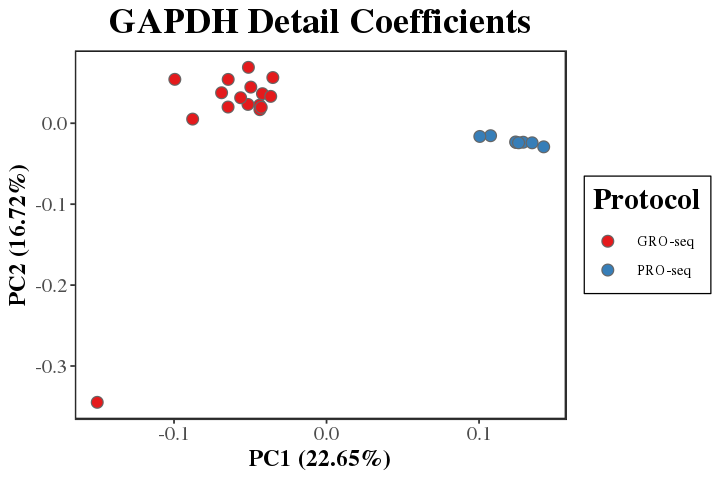

In [10]:
options(repr.plot.width=6, repr.plot.height=4)
gg_pca(gapdh_pc_df, gapdh_pc_df$PC1,
       gapdh_pc_df$PC2, gapdh_pc_df$protocol,"Set1",
      "GAPDH Detail Coefficients","PC1 (22.65%)", "PC2 (16.72%)", "Protocol")

### PCA for Approximation Coefficients

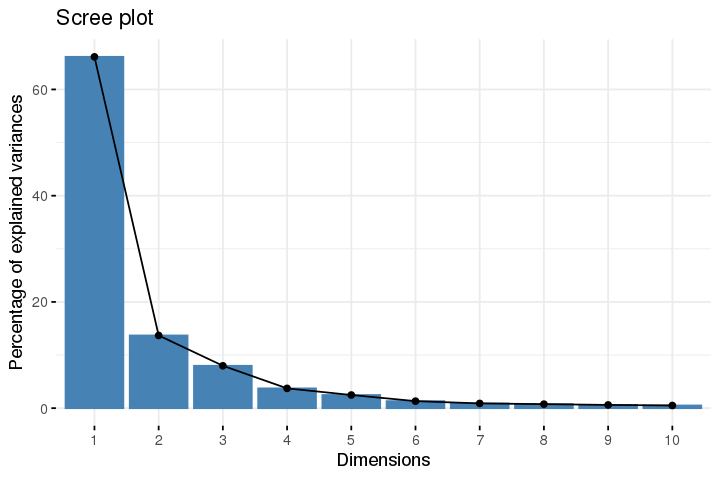

In [11]:
##Originbal PCA with all samples
gapdh_pc_app <- prcomp(gapdh_low_frequency)

options(repr.plot.width=6, repr.plot.height=4)
return(fviz_eig(gapdh_pc_app))

In [12]:
gapdh_pc_app_df <- pca_custom_df(gapdh_pc_app)

pc_summary(gapdh_pc_app)

[1] "PC1 variance explained = 66.14 %"
[1] "PC2 variance explained = 13.69 %"
[1] "PC3 variance explained = 7.98 %"
[1] "PC4 variance explained = 3.73 %"


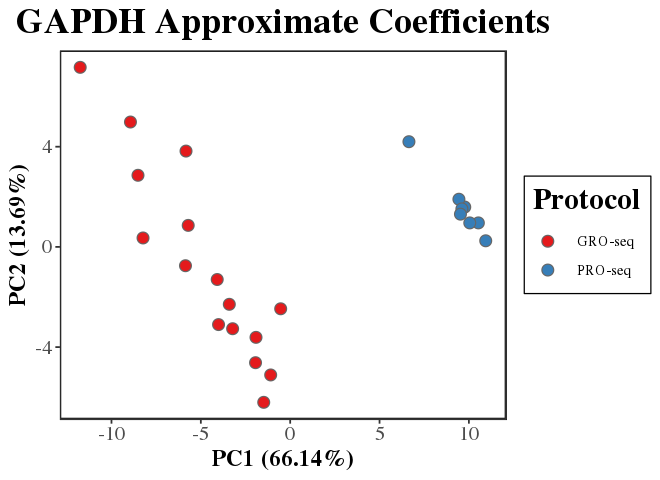

In [13]:
options(repr.plot.width=5.5, repr.plot.height=4)
gg_pca(gapdh_pc_app_df, gapdh_pc_app_df$PC1,
       gapdh_pc_app_df$PC2, gapdh_pc_app_df$protocol,"Set1",
      "GAPDH Approximate Coefficients","PC1 (66.14%)", "PC2 (13.69%)", "Protocol")

## FTL

In [14]:
ftl_high_frequency <- read.table('./processed_data/ftl_high_frequency_details_sasse.tsv', sep = '\t')
ftl_low_frequency <- read.table('./processed_data/ftl_low_frequency_approx_sasse.tsv', sep = '\t')

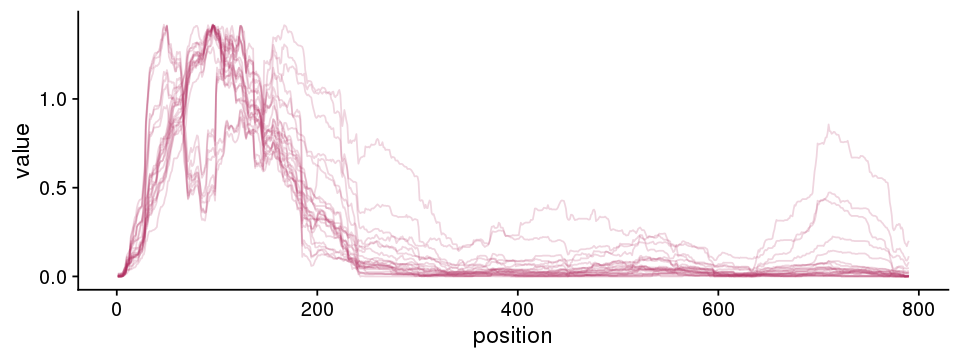

In [15]:
ftl_low_data <- df_restructure(ftl_low_frequency, names)
options(repr.plot.width=8, repr.plot.height=3)
approximation_plot(ftl_low_data)

### PCA for Detail Coefficients


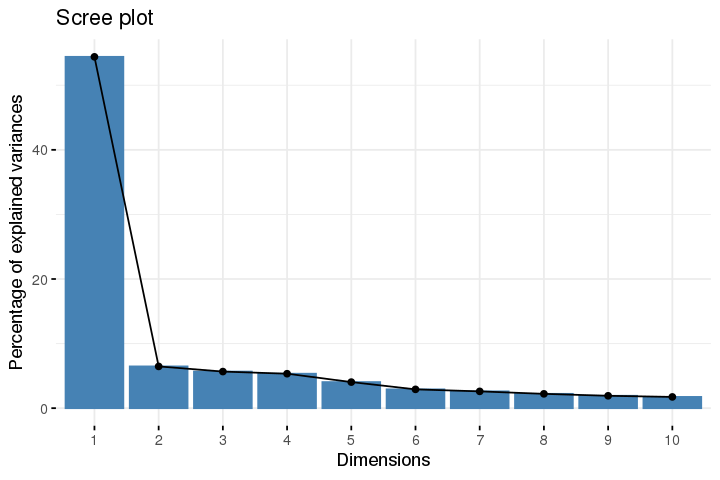

In [16]:
##Originbal PCA with all samples
ftl_pc <- prcomp(ftl_high_frequency)

options(repr.plot.width=6, repr.plot.height=4)
return(fviz_eig(ftl_pc))

In [17]:
ftl_pc_df <- pca_custom_df(ftl_pc)

pc_summary(ftl_pc)

[1] "PC1 variance explained = 54.4 %"
[1] "PC2 variance explained = 6.47 %"
[1] "PC3 variance explained = 5.67 %"
[1] "PC4 variance explained = 5.34 %"


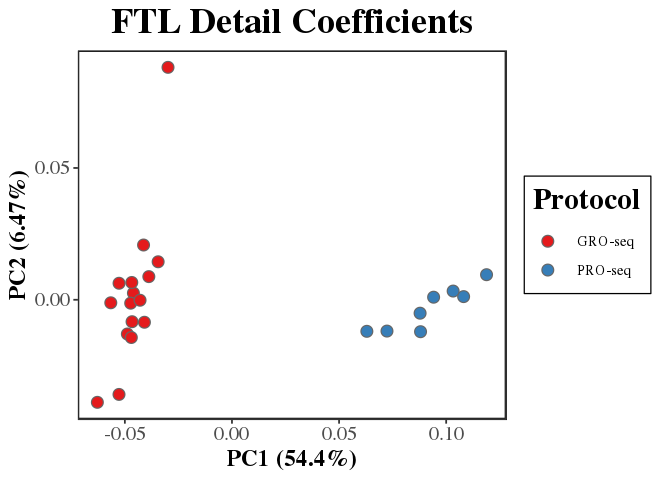

In [18]:
options(repr.plot.width=5.5, repr.plot.height=4)
ftl_det_pca <- gg_pca(ftl_pc_df, ftl_pc_df$PC1,
                       ftl_pc_df$PC2, ftl_pc_df$protocol,"Set1",
                       "FTL Detail Coefficients","PC1 (54.4%)", "PC2 (6.47%)", "Protocol")

ftl_det_pca

In [19]:
ggsave(ftl_det_pca, width = 5, height = 4,
       filename = "./figures/ftl_pca_detail.pdf", 
       bg = "transparent")

ggsave(ftl_det_pca, width = 5, height = 4,
       filename = "./figures/ftl_pca_detail.png", 
       bg = "transparent")

### PCA for Approximation Coeffiecients

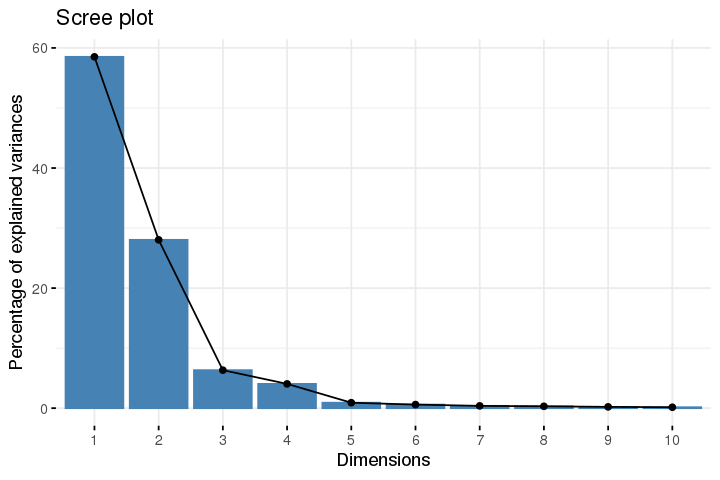

In [20]:
##Originbal PCA with all samples
ftl_pc_app <- prcomp(ftl_low_frequency)

options(repr.plot.width=6, repr.plot.height=4)
return(fviz_eig(ftl_pc_app))

In [21]:
ftl_pc_app_df <- pca_custom_df(ftl_pc_app)

pc_summary(ftl_pc_app)

[1] "PC1 variance explained = 58.52 %"
[1] "PC2 variance explained = 28.04 %"
[1] "PC3 variance explained = 6.33 %"
[1] "PC4 variance explained = 4.04 %"


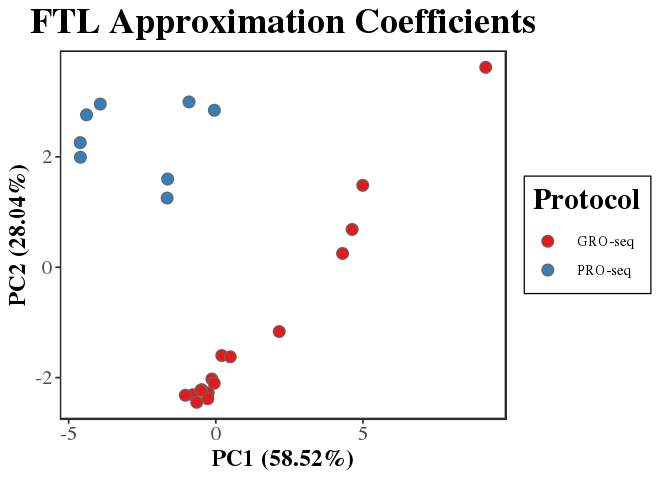

In [22]:
options(repr.plot.width=5.5, repr.plot.height=4)
ftl_app_pca <- gg_pca(ftl_pc_app_df, ftl_pc_app_df$PC1,
                      ftl_pc_app_df$PC2, ftl_pc_app_df$protocol,"Set1",
                      "FTL Approximation Coefficients","PC1 (58.52%)", "PC2 (28.04%)",
                      "Protocol")

ftl_app_pca

In [23]:
ggsave(ftl_app_pca, width = 5, height = 4,
       filename = "./figures/ftl_pca_approx.pdf", 
       bg = "transparent")

ggsave(ftl_app_pca, width = 5, height = 4,
       filename = "./figures/ftl_pca_approx.png", 
       bg = "transparent")

## UBB

In [24]:
ubb_high_frequency <- read.table('./processed_data/ubb_high_frequency_details_sasse.tsv', sep = '\t')
ubb_low_frequency <- read.table('./processed_data/ubb_low_frequency_approx_sasse.tsv', sep = '\t')


In [25]:
ubb_low_data <- df_restructure(ubb_low_frequency, names)


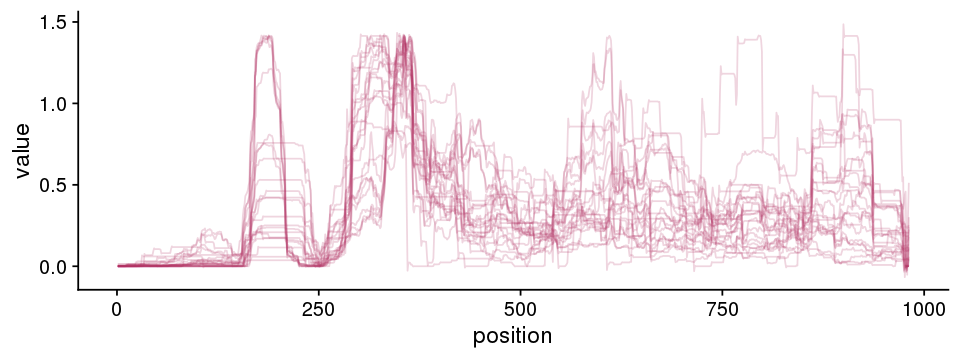

In [26]:
options(repr.plot.width=8, repr.plot.height=3)
approximation_plot(ubb_low_data)

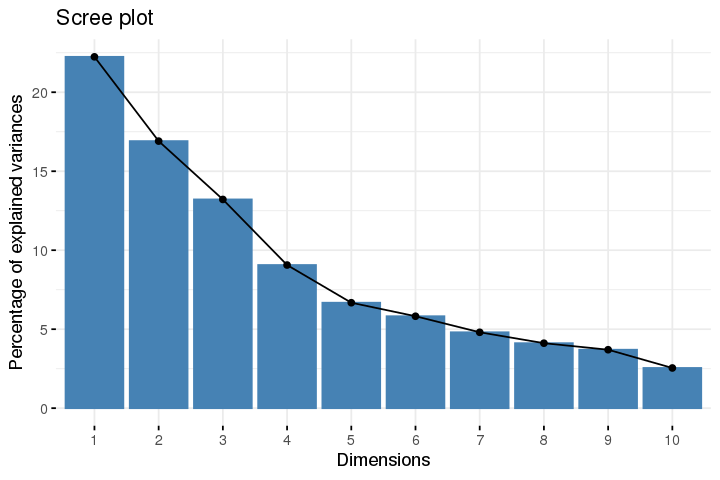

In [27]:
##Originbal PCA with all samples
ubb_pc <- prcomp(ubb_high_frequency)

options(repr.plot.width=6, repr.plot.height=4)
return(fviz_eig(ubb_pc))

In [28]:
pc_summary(ubb_pc)

[1] "PC1 variance explained = 22.24 %"
[1] "PC2 variance explained = 16.91 %"
[1] "PC3 variance explained = 13.21 %"
[1] "PC4 variance explained = 9.06 %"


In [29]:
ubb_pc_df <- pca_custom_df(ubb_pc)


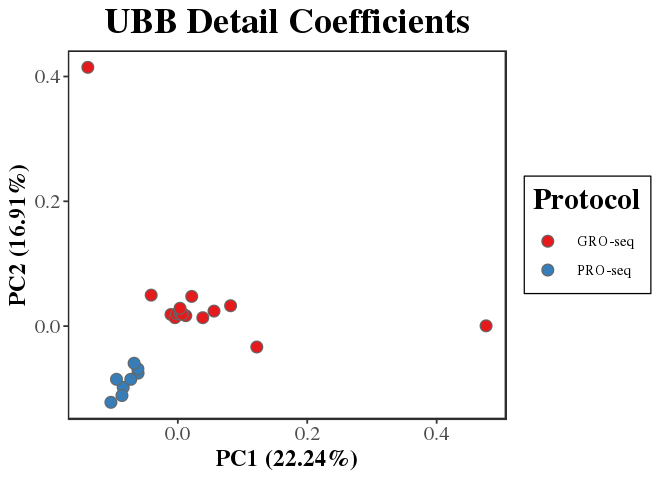

In [30]:
options(repr.plot.width=5.5, repr.plot.height=4)
gg_pca(ubb_pc_df, ubb_pc_df$PC1,
       ubb_pc_df$PC2, ubb_pc_df$protocol,"Set1",
      "UBB Detail Coefficients","PC1 (22.24%)", "PC2 (16.91%)", "Protocol")

## RNA18SN5

In [31]:
rna18_high_frequency <- read.table('./processed_data/rna18sn5_high_frequency_details_sasse.tsv', sep = '\t')
rna18_low_frequency <- read.table('./processed_data/rna18sn5_low_frequency_approx_sasse.tsv', sep = '\t')


In [32]:
rna18_low_data <- df_restructure(rna18_low_frequency, names)

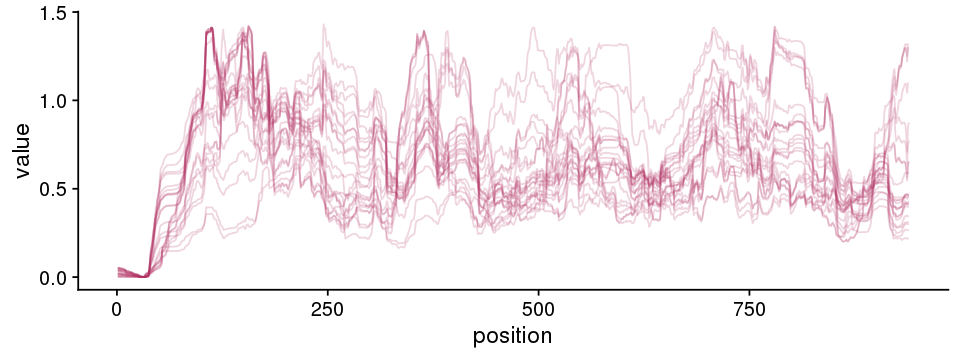

In [33]:
options(repr.plot.width=8, repr.plot.height=3)
approximation_plot(rna18_low_data)

### PCA for Detail Coefficients

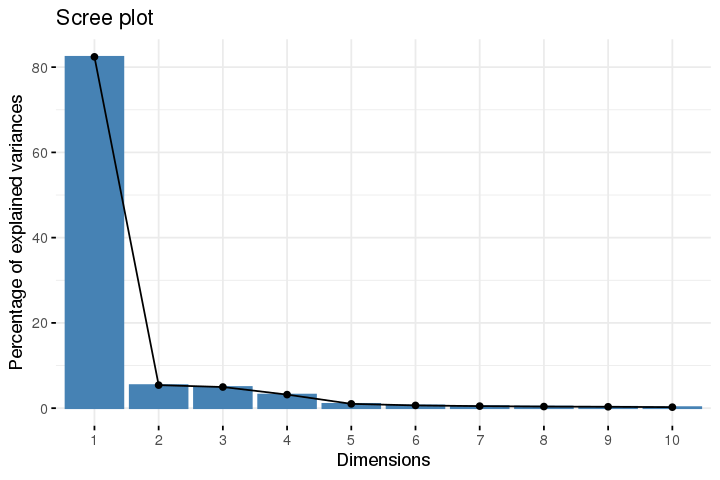

In [34]:
##Originbal PCA with all samples
rna18_pc <- prcomp(rna18_high_frequency)

options(repr.plot.width=6, repr.plot.height=4)
return(fviz_eig(rna18_pc))

In [35]:
rna18_pc_df <- pca_custom_df(rna18_pc)
pc_summary(rna18_pc)

[1] "PC1 variance explained = 82.41 %"
[1] "PC2 variance explained = 5.41 %"
[1] "PC3 variance explained = 4.96 %"
[1] "PC4 variance explained = 3.18 %"


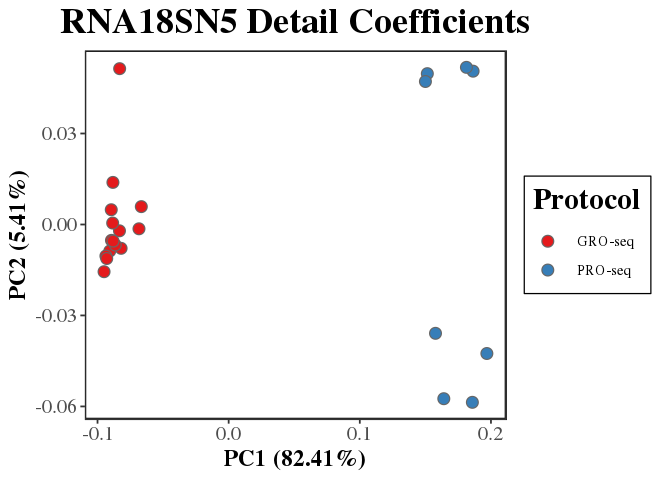

In [36]:
options(repr.plot.width=5.5, repr.plot.height=4)
rna18_det_pca <- gg_pca(rna18_pc_df, rna18_pc_df$PC1,
       rna18_pc_df$PC2, rna18_pc_df$protocol,"Set1",
      "RNA18SN5 Detail Coefficients","PC1 (82.41%)", "PC2 (5.41%)", "Protocol")

rna18_det_pca

In [37]:
ggsave(rna18_det_pca, width = 5.5, height = 4,
       filename = "./figures/rna18_pca_detail.pdf", 
       bg = "transparent")

ggsave(rna18_det_pca, width = 5.5, height = 4,
       filename = "./figures/rna18_pca_detail.png", 
       bg = "transparent")

### PCA for Approximation Coefficients

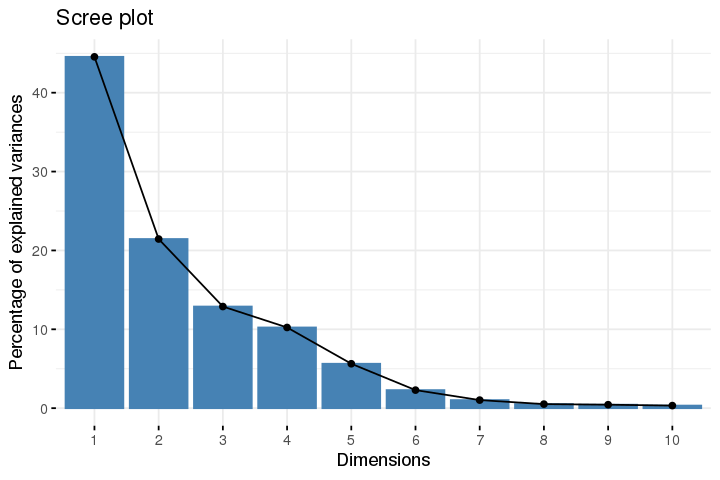

In [38]:
##Originbal PCA with all samples
rna18_pc_app <- prcomp(rna18_low_frequency)

options(repr.plot.width=6, repr.plot.height=4)
return(fviz_eig(rna18_pc_app))

In [39]:
rna18_pc_app_df <- pca_custom_df(rna18_pc_app)

pc_summary(rna18_pc_app)

[1] "PC1 variance explained = 44.55 %"
[1] "PC2 variance explained = 21.45 %"
[1] "PC3 variance explained = 12.89 %"
[1] "PC4 variance explained = 10.23 %"


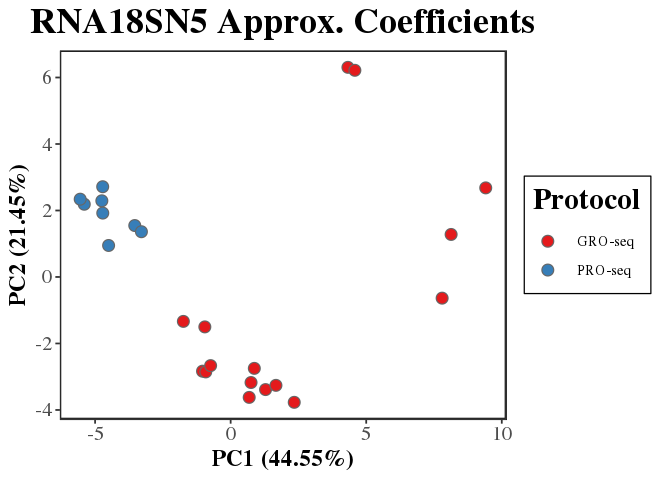

In [40]:
options(repr.plot.width=5.5, repr.plot.height=4)
rna18_app_pca <- gg_pca(rna18_pc_app_df, rna18_pc_app_df$PC1,
       rna18_pc_app_df$PC2, rna18_pc_app_df$protocol,"Set1",
      "RNA18SN5 Approx. Coefficients","PC1 (44.55%)", "PC2 (21.45%)", "Protocol")

rna18_app_pca

In [41]:
ggsave(rna18_app_pca, width = 5.5, height = 4,
       filename = "./figures/rna18_pca_approx.pdf", 
       bg = "transparent")

ggsave(rna18_app_pca, width = 5.5, height = 4,
       filename = "./figures/rna18_pca_approx.png", 
       bg = "transparent")

### What is the separation on PC2 for PRO-seq?

- separation by treatment replicates
    - TD = TNFalpha + dex
    - TE = TNFalpha + ethanol
    - D = dex
    - E = ethanol

In [50]:
rownames(rna18_pc_df) <- names$V1

In [48]:
subset(rna18_pc_df, PC1 > 0.1 & PC2 >0)

,PC1,PC2,PC3,PC4,protocol
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B2B30PROseq-TD2,0.1863760,0.05055639,-0.01703398,-0.008877250,PRO-seq
B2B30PROseq-TE2,0.1514829,0.04973820,-0.02098741,-0.006060028,PRO-seq
B2B30PROseq-D2,0.1813010,0.05181910,-0.01906222,-0.007995053,PRO-seq
B2B30PROseq-E2,0.1500374,0.04715195,-0.01927557,-0.005512601,PRO-seq


In [49]:
subset(rna18_pc_df, PC1 > 0.1 & PC2 <0)

,PC1,PC2,PC3,PC4,protocol
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
B2B30PROseq-TE,0.1577186,-0.03589696,0.01360706,0.0040048559,PRO-seq
B2B30PROseq-TD,0.1858340,-0.05865194,0.02216540,0.0050192734,PRO-seq
B2B30PROseq-D,0.1968814,-0.04254963,0.01657441,0.0008698486,PRO-seq
B2B30PROseq-E,0.1640487,-0.05745633,0.02145042,0.0087014913,PRO-seq
